In [53]:
include("ChaosFunctions.jl")

addnoise (generic function with 1 method)

In [42]:
using Plots

In [44]:
z=lorenzpoints(5000,0.05)

3×5001 Array{Float64,2}:
 -9.3954   -9.11588  -8.65294  -8.14648  …   0.348011  -0.90338  -1.72562
 -9.09342  -8.3313   -7.63451  -7.18491     -2.88828   -2.83896  -3.19333
 28.5537   28.7701   28.4925   27.8354      24.9674    21.8964   19.3518

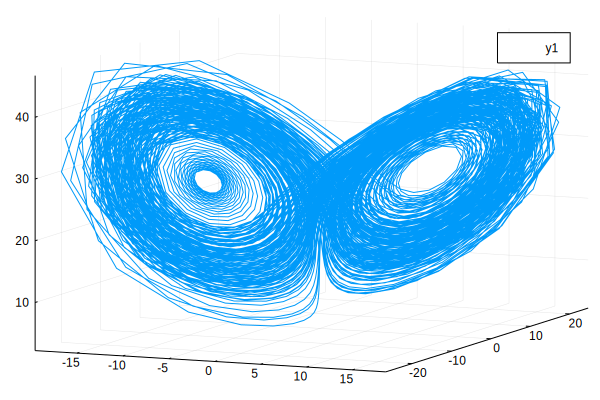

In [45]:
plot(z[1,:],z[2,:],z[3,:])

In [47]:
z=rosslerpoints(5000,0.2)

3×5001 Array{Float64,2}:
 -2.09051    -1.75877    -1.34197   …  -0.459284  -1.49662   -2.20517
 -1.45337    -1.90718    -2.303         3.23109    3.15526    2.90361
  0.0252208   0.0261013   0.027361      3.509      0.936751   0.227118

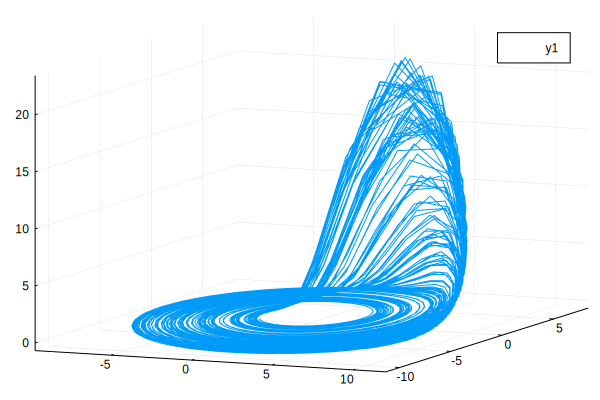

In [48]:
plot(z[1,:],z[2,:],z[3,:])

In [65]:
z=itmap(tinkerbell,-[0.7, 0.6],10000)

2×10000 Array{Float64,2}:
 -0.106024  -0.00524985   0.0848639  …  -0.0789416  -0.43416   -0.148745
 -0.407701  -0.329446    -0.171764      -0.978687   -0.492709  -0.686846

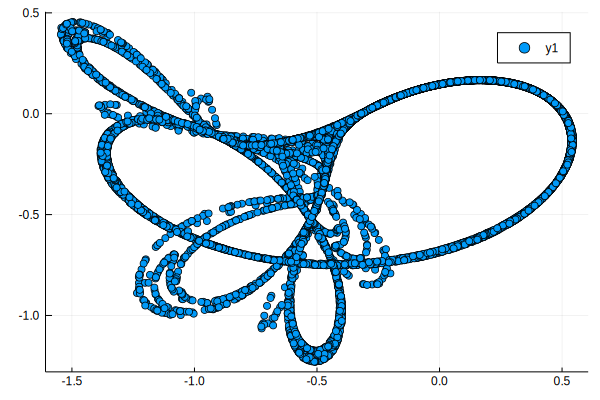

In [66]:
plot(z[2,:],z[1,:],linetype=:dots)

In [67]:
zn=addnoise(z,0.05)

2×10000 Array{Float64,2}:
 -0.112616  -0.00561539   0.0744928  …  -0.0549002  -0.442295  -0.141682
 -0.400213  -0.361428    -0.152916      -0.982062   -0.490361  -0.700429

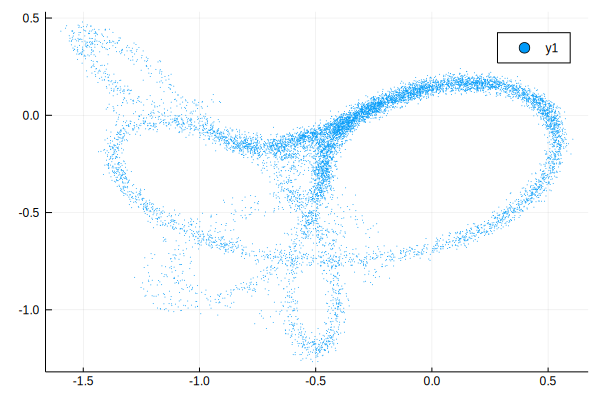

In [69]:
plot(zn[2,:],zn[1,:],linetype=:dots,markersize=0.1)

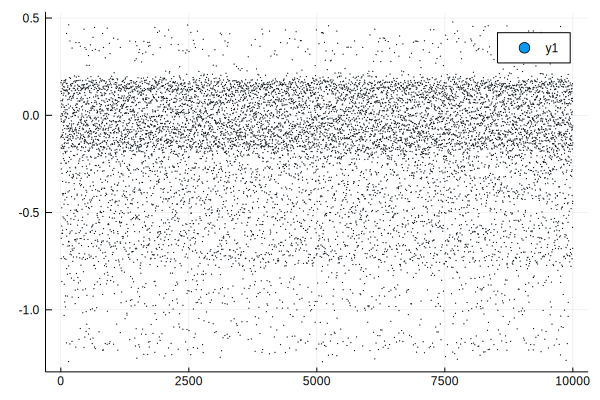

In [72]:
plot(zn[1,:],linetype=:dots,markersize=0.5)

In [106]:
#include("BasisFunctionTypes.jl")
include("Place.jl")

Main.Place

In [107]:
Schwarz = :(nx*log(mss)+nk*log(nx))
Akaike = :(nx*log(mss)+2*nk)
Model30 = :(-nk*(nk<=30))
#nx is # of observation (length of data)
#nk is # of parameters (basis functions in model)
#mss is the mean-sum-square model prediction error


:(-nk * (nk <= 30))

In [108]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (tophat,gaussian),
    "embedding" => [0, 1, 2, 3],
    "penalty"=> Akaike,
    )

Dict{String,Any} with 5 entries:
  "penalty"   => :(nx * log(mss) + 2nk)
  "stopstep"  => 10
  "embedding" => [0, 1, 2, 3]
  "testdatum" => 8000
  "functions" => (tophat, gaussian)

In [109]:
mymodel, X, zout, mdlv = Place.buildmodel(zn,options)

dx=4, nx=7999
*MSS=0.1947385504511274 DL=-13085.142998355994 size=1
MSS=0.19680259431061695 DL=-13000.80734171382 size=1
*MSS=0.1723205344126402 DL=-14061.433315423365 size=2
MSS=0.1781377668597418 DL=-13795.859257375881 size=2
*MSS=0.16475006754664126 DL=-14418.802239142931 size=3
*MSS=0.16141438129428887 DL=-14582.419609028382 size=3
*MSS=0.13425143451684352 DL=-16054.31884102894 size=4
*MSS=0.13193280599890927 DL=-16191.674789198152 size=5
*MSS=0.12341460495322822 DL=-16725.554353779655 size=5
*MSS=0.11913388570686495 DL=-17005.931119362496 size=6
MSS=0.11993473324327318 DL=-16952.339782835028 size=6
*MSS=0.11663739085077991 DL=-17173.3343563888 size=7
*MSS=0.11651024206464393 DL=-17180.05898488632 size=8
*MSS=0.11579409863021102 DL=-17229.37747339832 size=8
*MSS=0.11572043514133545 DL=-17232.46773065173 size=9
*MSS=0.10965125287458202 DL=-17663.39257409185 size=9
MSS=0.10962406737184972 DL=-17663.375987795 size=10
*MSS=0.10934246067167412 DL=-17683.95057749815 size=10
MSS=0.1093186

(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [0, 1, 2, 3], 1.7418968833631252, [-1.2266920294730475 0.13284434457412864 … -0.5189194844284368 -0.5377524816984989; -0.5091574917028822 0.19619332364070535 … -0.1455292352759426 0.2966724182468989; -0.7794140097799673 0.05078657100182042 … -0.6198333825113806 -0.40169344286186326; -0.3213904871084997 0.5098094129091212 … -0.1182440133034473 -1.2566524371798795], [4.994957098324267]), Main.Place.BasisFunc(tophat, [0, 1, 2, 3], 1.2171115336204592, [-1.2266920294730475 0.13284434457412864 … -0.5189194844284368 -0.5377524816984989; -0.5091574917028822 0.19619332364070535 … -0.1455292352759426 0.2966724182468989; -0.7794140097799673 0.05078657100182042 … -0.6198333825113806 -0.40169344286186326; -0.3213904871084997 0.5098094129091212 … -0.1182440133034473 -1.2566524371798795], [4.63218110122849]), Main.Place.BasisFunc(tophat, [0, 1, 2, 3], 0.9063440196215203, [-1.2266920294730475 0.13284434457412864 … -0.518919484428

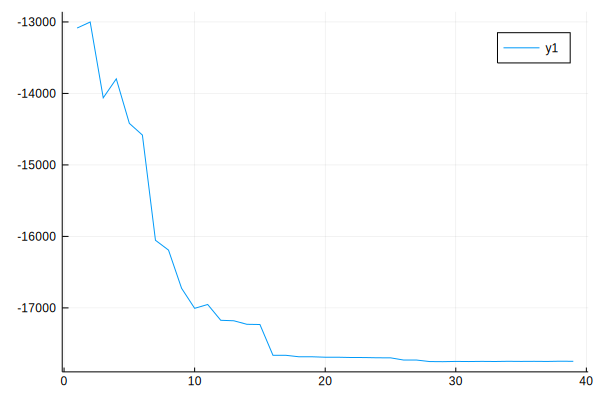

In [110]:
plot(mdlv)

In [112]:
yt,yp,ep = Place.predict(mymodel, zn)

([0.07023021509382232, -0.18138583340638803, 0.1739071788746802, -0.07710111136181386, 0.19464427047025712, 0.09098908260429361, -0.2525343010361931, -0.07498605589939444, -0.5348786196176345, -0.48334001937439375  …  -0.3743547325258909, -0.4823828292539014, -0.45636201888034034, -0.28393753772688335, -0.4667677613871941, -0.6627345968030554, -0.3081194641814129, -0.5228469520254193, -0.09057097134156618, -0.6343628432959791], [0.07449282979234768, -0.15291637828268612, 0.16731094649137143, 0.022386093685559043, 0.12300919481657517, 0.3730167286085033, -0.24664482758286324, 0.5542248857007733, -0.7367526448491001, -0.3837930006116582  …  -0.5761198836851441, -1.1021577150519644, -0.6839728025463117, -0.4266486273201017, -0.05490017605743403, -0.9820615867470075, -0.44229534290012174, -0.4903611634154758, -0.14168176742888228, -0.7004290081547035], [-0.0042626146985253605, -0.028469455123701914, 0.006596232383308781, -0.0994872050473729, 0.07163507565368195, -0.2820276460042097, -0.005

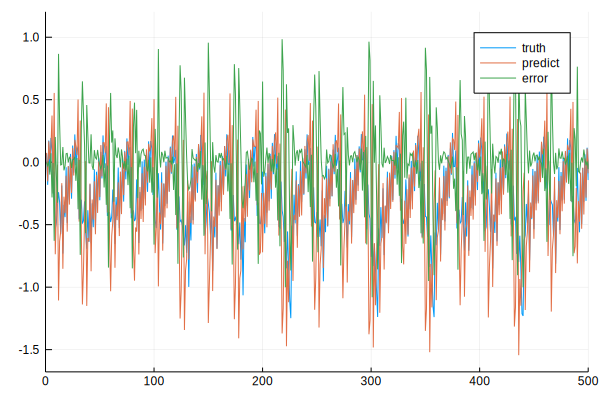

In [120]:
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

In [121]:
yp = Place.freerun(mymodel,zn,5000)

5001-element Array{Float64,1}:
  0.07023021509382232
  0.0199395411058223
  0.09656768356395151
  0.1738506810709568
  0.02343757651956313
  0.09801348310818447
  0.04545902850827943
  0.10812043779097635
  0.1112231622998765
  0.0648099773328612
  0.09370981018525626
  0.06772457142609767
  0.10229079839429733
  ⋮
  0.0867374972899615
  0.08673749728996594
  0.08673749728996327
  0.08673749728996594
  0.08673749728996327
  0.08673749728996327
  0.08673749728996416
  0.08673749728996416
  0.08673749728996505
  0.08673749728996505
  0.08673749728996416
 21.373901447396275

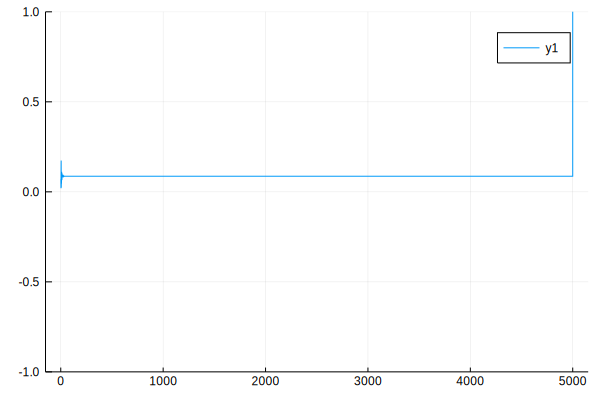

In [124]:
plot(yp,ylimit=(-1,1))